# BLU03 - Learning Notebook - Part 2 of 3 - HTTP requests

## 1. Introduction

In this notebook, you'll be introduced to the wonderful world of getting data from APIs (Application Programming Interfaces).
And APIs really are a fantastic data source because they can usually give access to structured data, very fast.

But before learning about APIs, we need to take a step back and learn more about the process that allows us to communicate with them, which is through HTTP requests - in particular, the GET request.

## 2. What is HTTP

[HTTP](https://en.wikipedia.org/wiki/Hypertext_Transfer_Protocol), which means Hypertext Transfer Protocol, is the protocol used for data communication in the [Web](https://en.wikipedia.org/wiki/World_Wide_Web).

We won't go into much detail about HTTP here. We'll just introduce you to the basics of what it's used for and how it works.

When two hosts communicate in the Web, there is usually a **client-server** relationship between them. The client is the host that requests resources, and the server is the host that retrieves them.
An example of this relationship happens when you surf the Web. Imagine you want to read Sam's [blog post](https://medium.com/lisbon-data-science-academy/in-the-name-of-love-for-data-science-e5588d31b248) about our Academy: there is a client, which is your web browser, that will request a web page to a server, which is the machine hosting [Medium's](https://medium.com/) website.

Now, HTTP is the protocol that establishes the rules for the communication between the client and the server.
These rules are pretty simple: they say that the communication starts with the client sending a **Request** message to the server, followed by the server sending a **Response** message to the client.

![title](media/client_server.png)

### 2.1 Request message

The HTTP request message has two main elements: the **URL** and the **method**.

The URL is the address where the web resource we want to retrieve lives in. For instance, to load the Academy's website, the URL in the request message sent by the browser is https://www.lisbondatascience.org/.

The method is a key word that indicates the type of action we're requesting from the server. The most common methods are:

* **GET**: used to download a resource from the server, e.g. opening a blog post from Medium in our browser.
* **POST**: used to upload something new to the server, e.g. creating a new blog post in Medium.
* **PUT**: used to update something that already exists in the server, e.g. adding some lines to an existing blog post in Medium.
* **DELETE**: used to delete something from the server, e.g. deleting a blog post in Medium.

Since the methods represent actions, they can also be referred to as HTTP verbs.

### 2.2 Response message

Regarding the HTTP response message, the two elements that we're most interested in are the **status code** and the **content**.

The status code is a number that indicates whether the request had a successful outcome, and if not, gives some information about the problem that occurred.

There are hundreds of different status codes, which you can consult [here](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes).

Thankfully, they are structured in a clever way, which allows us to "survive" by knowing only three patterns:

* **2xx** = Success - your request had a good outcome!
* **4xx** = Client error, something is wrong with the way you're doing your request, so you should fix it
* **5xx** = Server error, something is wrong with the server - you won't get what you're requesting 

The content of a response message is where the server actually sends a message to the client. Depending on the request type, and the outcome of the request, the content can be many things:
- in case the request was a GET and it was successful, the response content will be the resource that was requested, like a web page (which is in fact an HTML file).
- in case the request was a POST and it was successful, the response content will usually be the location of the newly created entity, for instance, in our blog post example, the content could be the id of the new blog post.
- in case the request was not successful, the content will usually be a descriptive error message, that allows to better understand what went wrong with our request.
- in particular, it's possible to have a response without content. In this case, the response has the 204 status code, which tells us that the server processed the request successfully, but no content was returned.

### 2.3 Header

Both in the request and response messages, there is an another important element, which is the **header**.
The header contains parameters that are necessary for the communication between the client and the server to occur.

Two examples of such parameters are the **authentication** fields and **cookies**.

It's common for a server to require some form of authentication from the client in order to respond to its requests.
Authentication can happen in many forms, for instance a [username and password pair](https://en.wikipedia.org/wiki/Basic_access_authentication) or a [token](https://en.wikipedia.org/wiki/JSON_Web_Token), and usually, authentication data is sent to the server in the request header.

HTTP is a stateless protocol. This means that the server doesn't keep track of the interactions it has with the client; the requests sent from the client to the server are independent from each other. 
But many times, it's useful that the server keeps track of its interactions with the client - for instance, when a user is logged in on a web site.
This can be achieved with a [cookie](https://en.wikipedia.org/wiki/HTTP_cookie), which is a unique identifier that the client sends in the header of its requests to the server, allowing the server to keep track of the identity of the client.

## 3. GET request

Now that you've been introduced to HTTP, we can focus on the part that is really important in the data wrangling context: GET requests.

Python has a very handy library to do HTTP requests, called [requests](https://requests.readthedocs.io/en/master/user/quickstart/).

Let's see some examples on how to use it to do HTTP GET requests.

In [1]:
import json
# Import the requests library
import requests
# Import some helper functions to print shorter outputs
import utils

# Import some helper packages to handle images
from PIL import Image
from io import BytesIO

The first example that we'll see is getting a web page.

In [2]:
# Method get receives an URL as argument and does an HTTP GET request to that URL
# It returns a Response object
response = requests.get('http://www.lisbondatascience.org/')
response

<Response [200]>

We can access the **status_code** property of the response object to know the resulting status code.

In [3]:
# It should be 200 :)
response.status_code

200

We can access the **text** property of the response object to get the content of the response as a string.

In this case, the content is an HTML file as a string, which doesn't tell us much... you'll learn more about it in the next notebook!

In [4]:
utils.friendly_print_string(response.text)

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd"><html xmlns="http://www.w3.org/1999/xhtml"><head><META http-equiv="Content-Type" content="text/html; charset=UTF-8" >
      <!--7f3394ee-2bc1-4e2a-bab8-b6f82f2f95a1 b-->

    <title>Lisbon Data Science Academy</title>
    <meta name="keywords" content="Lisbon Data Science Academy">
    <meta name="description" content="Lisbon Data Science Academy">

    

    


    

    <meta name="view


The next example we'll see is how to request an image.
For this we need to get the response content in bytes and then use some extra dependencies, to help converting binary data into an image.

In [5]:
# GET request
response = requests.get('https://i.imgur.com/1akoc20.jpg')

# Using the content property of the response object we get the content as bytes
response_bytes = response.content

# Printing short output, if you want to see everything, delete the friendly_print function call
utils.friendly_print_string(response_bytes)

b'\xff\xd8\xff\xfe\x004Optimized by JPEGmini 3.14.14.72670860 0x09ec1333\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\x13\n\x08\x0b\x19)\x1b\x19\x17\x17\x193\x14\x15\x10)<5?>;5:9BJ_PBFZG9:RpTZbejkj@Ou}sg{_hjf\xff\xdb\x00C\x01\n\x13\x13\x19\x0c\x191\x1b\x1b1fD:Dffffffffffffffffffffffffffffffffffffffffffffffffff\xff\xc2\x00\x11\x08\x03 \x04\xb0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x03\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\xff\xc4\x00\x18\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xf9\x16\xaf\x84\x85h\x89\xb5l\x0c\xd1\x0c\n\x97\x15PE\xa4\xe1*\x138\xd2*h5K\x9a\x8d\x14\xa5B\xa4\xa7o2\x15D\xa9)\xdd\xa2\x04\xd5\xc5@\x9a\x91\xb9cBT\x05\x95\xa4\xeb\x90\xaa%\x9a\x8a\xd6\xa9;\x89\xd4\xd79\xa7U\xcb\\\xd8v\xe1\xb7&]\x18\xf6\x99F\x8bQU\xd4\xb9GD\x18.\x85\xa79\xbc\xd66\x84\xef\xee\xf3\xbd\x0eW\xacu\xcf<\x1ew\xad\

Then we use BytesIO to get the bytes as a stream, and finally, we use Image.open to convert the stream into an image.

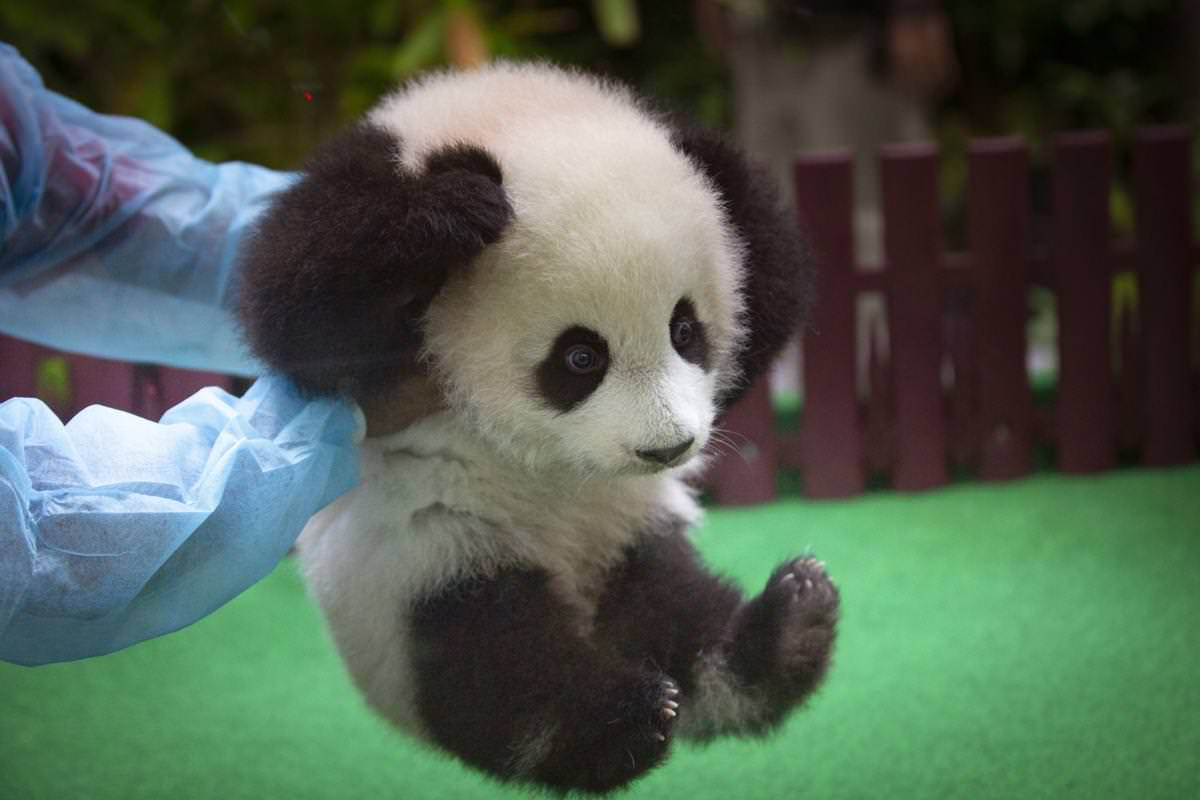

In [6]:
i = Image.open(BytesIO(response_bytes))

# Tcharan! The cutest baby panda
i

Finally, we will see an example where the response is a `JSON` object, which is much easier to handle than an HTML file.

JSON objects are very easy to parse! Being so user friendly, the JSON format has became the most popular way to exchange data through HTTP requests.

So before moving on to the final example, let's learn about APIs!

## 4. Public APIs

[API](https://en.wikipedia.org/wiki/Application_programming_interface) stands for Application Programming Interface. Cool - but what does this really mean?

In general, an API is the point of contact between an entity and the other entities that wish to communicate with it; the API defines a set of rules that the other entities should follow in the communication.

In our context, an API can be seen as a host that receives GET requests, and returns data.

Public APIs are open APIs, that can be accessed by anyone. There also exist private APIs that can only be accessed by some entities, as is the case of APIs in most companies.

You'll find that public APIs are a very good source of data, because (generally):
* they return structured data (which is easy to parse), usually in JSON format
* they are nicely documented

But unfortunately, there are some downsides too:
* they have rate limits, which means that you can't have hundreds of threads getting data from the APIs in parallel to speed up the process
* they usually require authentication

Moving onto the final example: our very own LDSA API! This is just an illustrative API that contains fake information about user account. Check out its documentation here:  https://learning-api.lisbondatascience.org/ui/


This is the base URL of the API:

```
https://learning-api.lisbondatascience.org
```

Now, the API has a set of **endpoints**, which are the valid communication channels that we can use to communicate with the API, each with its own URL.

For instance, the **/random** endpoint.

In [7]:
# Base URL
base_url = 'https://learning-api.lisbondatascience.org/'

In [8]:
# Get one random user
random_url = base_url + '/random'
response = requests.get(random_url)
response.json()

{'email': 'mmatteuzzin@businessweek.com',
 'first_name': 'Mady',
 'gender': 'Polygender',
 'id': 24,
 'ip_address': '5.33.158.27',
 'last_name': 'Matteuzzi'}

According to the documentation, the **user/** endpoint returns a list of users.

But we can use **query parameters** to subset the users. Query parameters are added at the end of the endpoint's URL, after a **?** (question mark), and separated by **&** ('and' symbol).

The syntax is the following:

```
<BASE URL HERE>?firstname=Kelsey&lastname=Lakes
```

However, we won't be concatenating strings as the requests library has a very convenient way to handle query parameters: we just have to build a dictionary with them and feed it to the get method.

In [9]:
# GET request with query parameters
user_url = base_url + 'user'
payload = {'firstname': 'Kelsey', 'lastname': 'Lakes'}
response = requests.get(user_url, params=payload)

response.json()

[{'email': 'klakes1j@bluehost.com',
  'first_name': 'Kelsey',
  'gender': 'Female',
  'id': 56,
  'ip_address': '72.164.87.129',
  'last_name': 'Lakes'}]

Let's now try to get all the users.

In [10]:
response = requests.get(user_url).json()
len(response)

10

Hum... It's a bit odd that there are only 10 users...

That's right, there are much more! But when the response content is long, **pagination** is a very common practice.

Pagination is the process that the server uses to split the content in multiple pages in order to avoid the content-size to be too large.

So, when the response message is paginated, we have to do another request, specifying which page we want to get next.
The page is usually a query parameter, so we can do it like this.

In [11]:
# GET request with query parameters
payload = {'page': 2}
response = requests.get(user_url, params=payload)

response.json()

[{'email': 'abrecknalla@spiegel.de',
  'first_name': 'Annamarie',
  'gender': 'Agender',
  'id': 11,
  'ip_address': '246.196.202.218',
  'last_name': 'Brecknall'},
 {'email': 'sheinob@posterous.com',
  'first_name': 'Shandy',
  'gender': 'Bigender',
  'id': 12,
  'ip_address': '97.141.182.67',
  'last_name': 'Heino'},
 {'email': 'cfayec@is.gd',
  'first_name': 'Chlo',
  'gender': 'Bigender',
  'id': 13,
  'ip_address': '225.128.91.237',
  'last_name': 'Faye'},
 {'email': 'jbuckenhamd@prlog.org',
  'first_name': 'Jean',
  'gender': 'Genderqueer',
  'id': 14,
  'ip_address': '181.71.36.138',
  'last_name': 'Buckenham'},
 {'email': 'mgrealishe@baidu.com',
  'first_name': 'Marinna',
  'gender': 'Male',
  'id': 15,
  'ip_address': '55.106.241.164',
  'last_name': 'Grealish'},
 {'email': 'gsyslandf@alibaba.com',
  'first_name': 'Gilli',
  'gender': 'Agender',
  'id': 16,
  'ip_address': '17.46.98.240',
  'last_name': 'Sysland'},
 {'email': 'ynorsisterg@jalbum.net',
  'first_name': 'Yehudit'

In [34]:
# GET request with query parameters
total=[]
payload = {'page': 1}
response = requests.get(user_url, params=payload)
data= response.json()

while(True):
    payload['page'] = payload['page']+1
    response = requests.get(user_url, params=payload)
    data=response.json()
    if(data == []):
        break
    #print(payload['page'],'pagina')
    total = total + data
        
    
    
    
total

[{'email': 'abrecknalla@spiegel.de',
  'first_name': 'Annamarie',
  'gender': 'Agender',
  'id': 11,
  'ip_address': '246.196.202.218',
  'last_name': 'Brecknall'},
 {'email': 'sheinob@posterous.com',
  'first_name': 'Shandy',
  'gender': 'Bigender',
  'id': 12,
  'ip_address': '97.141.182.67',
  'last_name': 'Heino'},
 {'email': 'cfayec@is.gd',
  'first_name': 'Chlo',
  'gender': 'Bigender',
  'id': 13,
  'ip_address': '225.128.91.237',
  'last_name': 'Faye'},
 {'email': 'jbuckenhamd@prlog.org',
  'first_name': 'Jean',
  'gender': 'Genderqueer',
  'id': 14,
  'ip_address': '181.71.36.138',
  'last_name': 'Buckenham'},
 {'email': 'mgrealishe@baidu.com',
  'first_name': 'Marinna',
  'gender': 'Male',
  'id': 15,
  'ip_address': '55.106.241.164',
  'last_name': 'Grealish'},
 {'email': 'gsyslandf@alibaba.com',
  'first_name': 'Gilli',
  'gender': 'Agender',
  'id': 16,
  'ip_address': '17.46.98.240',
  'last_name': 'Sysland'},
 {'email': 'ynorsisterg@jalbum.net',
  'first_name': 'Yehudit'

So, how can we get all the data?
We just have to loop through the pages until the response content is empty. I'll leave that to you as an exercise :)

Finally, let's just see an example of a bad request to the API, which results in an error response.

In [12]:
# GET request, passing an obviously wrong parameter (a string for the page number)
bad_params = {
    "page": "hello"
}
response = requests.get(user_url, params=bad_params)

In [13]:
response.status_code

400

In [14]:
response.json()

{'detail': "Wrong type, expected 'integer' for query parameter 'page'",
 'status': 400,
 'title': 'Bad Request',
 'type': 'about:blank'}

## 5. Authentication in public APIs

It's very frequent that public APIs require authentication for you to use them.
The process to get an authentication form (like a username and password or a token), depends a lot on the API: some require you to fill a form with information about yourself and why you want to access the API, some will give you a token right away, some will ask you to pay something...

This is very normal, and it usually has to do with controlling the users' request rate.

Here, we'll show you an example of a public API that requires authentication, which is [TMDb](https://www.themoviedb.org/documentation/api), a movies database.

First they ask you to create an account on their website, [here](https://www.themoviedb.org/account/signup).
And then, you have to go to your profile settings in order to access an API Key.

Once you have your key, you can start making requests to TMDb's API, sending your API Key as a query parameter, like this.

```
payload = {'api_key': XXX} # fill XXX with your API key
response = requests.get(https://api.themoviedb.org/3/movie/76341, params=payload)
```

## 6. Optional

If you want to have some fun with HTTP status codes, you can lose yourself in [this](https://http.cat/) cat paradise!

Also, [here](https://www.ibm.com/support/knowledgecenter/en/SSGMCP_5.1.0/com.ibm.cics.ts.internet.doc/topics/dfhtl_uricomp.html) is a cool explanation about the components of a URL.